As per the problem we are supposed to develop an Evolutionary Algorithm which can find the largest amount of money that can be packed into a security van without exceeding a weight threshold the van could carry. The weight and money value of the bags are provided in file BankProbelm.txt
This type of problem is also known as the Knapsack Problem which is a class of combinatorial optimization problem.

### Importing Libraries

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import timeit 
from matplotlib import rcParams
rcParams['figure.dpi']=200

### Function for Population Generation

Initial Population – Generating an initial population of random size p. Each member of the population represents a solution. Here, binary encoding is used to represent each solution where 0 represents that the bag is out of the van and 1 represents bag is inside the van. This combination of 0s and 1s altogether makes up chromosome of a solution comprising of bags represented as genes in form of 0s and 1s. As, there are total 100 bags, length of each chromosome would be 100.

In [2]:
def generate_population(p,chromosome):
    '''
    Generate a population of size p of given chromosome

    Parameters
    ----------
    p : int
        Population Size
    chromosome : int
        Number of Bags encoded in binary.

    Returns
    -------
    Numpy array.

    '''
    return np.random.randint(2, size = (p,chromosome))

### Function for calculating Population Fitness

Fitness – Fitness of the solution in this problem is determined by the maximum value/amount of money without crossing weight threshold of the van. If a combination exceeds the van capacity threshold, the fitness of that combination is marked as 0.
 \begin{equation*} Fitness = 
\left( \sum_{i=1}^n c_i v_i \right); if  \left( \sum_{i=1}^n c_i w_i \le kw \right) 
            : Fitness = 0 ; Otherwise
\end{equation*}

where,
n = chromosome length, ci = ith gene, vi = ith value, wi = ith weight, kw = knapsack weight/ van weight threshold


In [6]:
def cal_fitness(population,weights,values,threshold):
    
    '''
    Calculate Fitness of the input population

    Parameters
    ----------
    population : np array
        Population with size(p,chromosome).
    weights : np array
        Weights in bags.
    values : np array
            MONEY VALUE IN BAGS.
    threshold : int
        MAXIMUM WEIGHT, VAN COULD CARRY.

    Returns
    -------
    fit_score : np array
        FITNESS OF THE POPULATION.
    weight_score : np array
        WEIGHTS OF THE POPULATION.

    '''
    fit_score = []
    weight_score = []
    for i in range(population.shape[0]):
        weight_score.append(np.sum(population[i] * weights))
        if weight_score[i] <= threshold:
            fit_score.append(np.sum(population[i] * values))
        else:
            fit_score.append(0)
    
    fit_score = np.array(fit_score)
    weight_score = np.array(weight_score)
    return (fit_score,weight_score)

### Function for Parent Selection

It is the process of selecting individuals from the population as parents. Here, we have used binary tournament selection twice to select two parents. To increase the selection pressure, the tournament size or number of candidates in the tournament can be increased. 

In [7]:
def selection(population,fitness,t):
    '''
    Selects parents from population using Tournament selection twice

    Parameters
    ----------
    population : Numpy Array
        POPULATION FROM WHICH SELECTION TO BE DONE.
    fitness : Numpy Array
        FITNESS OF CURRENT POPULATION.
    t : Int
        NUMBER OF CANDIDATES IN TOURNAMENT SELECTION.

    Returns
    -------
    Numpy Array
        PARENTS SEELCTED FROM POPULATION AFTER TOURNAMENT SELECTION.

    '''
    parents = []
    for i in range(2):
        idx = np.random.choice(population.shape[0],size=t,replace = False) # Chooses t random chromosomes from population
        best_fit = idx[fitness[1][idx].argmax()] # gives index of chromosome whose fitness is maximum from the choosen ones
        parents.append(population[best_fit]) # appending the fitter chromosome as a parent
    
    return np.array(parents)

### Function for Parent Crossover

It is a perturbation operator which involves a swapping of genes after a certain point (called crossover point) between the parents leading to generation of new candidate solutions. Here, we have used single point crossover. 

In [8]:
def crossover(parents):
    '''
    Performs single point crossover between parents after a randomly selected crossover point < length of chromosome

    Parameters
    ----------
    parents : Numpy Array
        SELECTED PARENTS ON WHICH SINGLE POINT CROSSOVER TO BE DONE.

    Returns
    -------
    offsprings : Nupy Array
            OFFSPRINGS GERNEATED AFTER SINGLE POINT CROSSOVER BETWEEN PARENTS.

    '''
  
    offsprings = parents.copy()
    crossover_point = random.randint(0,parents.shape[1]-2) # choosing cp < length of chromosome
    offsprings[0][crossover_point+1:],offsprings[1][crossover_point+1:] = parents[1][crossover_point+1:], parents[0][crossover_point+1:]
    
    return offsprings

### Function for Mutation

It is also a perturbation operator to introduce diversity in population. Several genes can be mutated or changed to obtain optimal solution. As, we used a binary encoded representation here, so mutation will be performed by reversing the gene value. 

In [9]:
def mutate(offsprings,num_genes):
    '''
    Performs mutation on the input offsprings by flipping the number of genes requested.

    Parameters
    ----------
    offsprings : Numpy Array
        OFFSPRINGS AFTER CROSSOVER OF PARENTS.
    num_genes : int
        NUMBER OF GENES TO BE MUTATED FROM CHROMOSOME.

    Returns
    -------
    mutated_offsprings : Numpy Array
        MUTATED OFFSPRINGS GENERATED AFTER GENE REPLACEMENT AS PER NUM_GENES

    '''
    mutated_offsprings = offsprings.copy()
    
    idx1 = np.random.choice(offsprings.shape[1],size = num_genes,replace=False)
    idx2 = np.random.choice(offsprings.shape[1],size = num_genes,replace=False)
    
    mutated_offsprings[0][idx1] = mutated_offsprings[0][idx1]^1
    mutated_offsprings[1][idx2] = mutated_offsprings[1][idx2]^1
    
    return mutated_offsprings

### Main Function for Evolutionay Algorithm to call all functions in a flow

1.Generates a random population <br> </br> 
2.Perform Selection <br> </br> 
3.Perform Crossover <br> </br> 
4.Perform Mutation <br> </br> 
5.Replace Weekest <br> </br> 

In [10]:
def main(p,chromosome,evaluations,t,M,item_number,weight,value,cap_limit):
    '''
    Performs Evolutionary Algorithm procedure by calling all required functions in order of the algorithm.

    Parameters
    ----------
    p : int
        POPULATION SIZE.
    t:  int
        TOURNAMENT SIZE
    M:  int
        NUMBER OF GENES TO MUTATE
    chromosome : int
        NUMBER OF BAGS ENCODED IN BINARY.
    evaluations : int
        NUMBER OF TIMES THE FITNESS EVALUATIONS WILL BE PERFORMED
    item_number: list
        BAG/ITEM LABEL
    weight: list
        WEIGHT OF EACH BAG
    value: list
        MONEY VALUE IN EACH BAG
    cap_limit: int
        WEIGHT THRESHOLD

    Returns
    -------
    final_generation_optimal_fitness: Float
        Optimal Fitness of final generation
    final_generation_optimal_weight: Float
        Optimal Weight of final generation
    pop:Numpy Array
        Last Generation Population
    final_generation_optimal_bags:Numpy Array
        Bag labels of final generation optimal solution
    fitness_history:Numpy Array
        Fitnesses of each generation

    '''
    
    pop = generate_population(p=p, chromosome=chromosome)
    fitness_history = np.empty(shape=(evaluations,p))
    weight_history = np.empty(shape=(evaluations,p))
    
    counter = 0
    while True:
        fit = cal_fitness(population=pop, weights=weight, values=value, threshold=cap_limit)
        fitness_history[counter] = fit[0]
        weight_history[counter] = fit[1]
        
        counter += 1
        
        parents = selection(population = pop, fitness = fit, t=t)
        
        offsprings = crossover(parents = parents)
        mutate_offsprings = mutate(offsprings=offsprings, num_genes=M)
        
        offsprings_fitness = cal_fitness(population=mutate_offsprings, weights=weight, values=value, threshold=cap_limit)
        #offspring_weight = offsprings_fitness[1] #commented as not in use
        offspring_fit = offsprings_fitness[0]
        
        weakest_idx = np.argpartition(fit[0],2)
        weakest_idx = weakest_idx[0:2]
        weakest_fitnesses = fit[0][weakest_idx] # This instance was not getting saved anywhere when directly running 
        # comparison or replacing. SO, saved it in weakest_fitnesses first and then repacked the resultant array with least fitness in the main fit
        
        weakest_fitnesses_population = pop[weakest_idx]
        
        comp = offspring_fit >= weakest_fitnesses
        for c in range(len(comp)):
            if comp[c] == True:
                #weakest_fitnesses[c] = offspring_fit[c]
                weakest_fitnesses_population[c] = mutate_offsprings[c]
                
        pop[weakest_idx] =  weakest_fitnesses_population
        
        if counter == evaluations:
            break
    
    #final_generation = pop  # Commented as not in use
    final_generation_optimal_fitness = fit[0].max()
    final_generation_optimal_weight = fit[1][fit[0].argmax()]
    final_generation_optimal_bags = pop[fit[0].argmax()]*item_number
    final_generation_optimal_bags = np.array([b for b in final_generation_optimal_bags if b!=0])
    

    return final_generation_optimal_fitness,final_generation_optimal_weight,pop,final_generation_optimal_bags,fitness_history


### Function to check effect of varying Population Size, Tournament Size and Mutation on Optimal value

In [11]:
def check_effect(p,c,e,t,M,trials,bag_number,bag_weights,bag_values,cap_limit):
    '''
    Check effects of varying values of p,t,M on optimal fitness value of Evolutionary Algorithm

    Parameters
    ----------
    p : int
        POPULATION SIZE.
    t:  int
        TOURNAMENT SIZE
    M:  int
        NUMBER OF GENES TO MUTATE
    c : int
        NUMBER OF BAGS ENCODED IN BINARY.
    e : int
        NUMBER OF TIMES THE FITNESS EVALUATIONS WILL BE PERFORMED
    trials : int
        NUMBER OF TRIALS OF EA.
    bag_number: list
        BAG/ITEM LABEL
    bag_weights: list
        WEIGHT OF EACH BAG
    bag_values: list
        MONEY VALUE IN EACH BAG
    cap_limit: int
        WEIGHT THRESHOLD

    Returns
    -------
    Matplotlib figure
    '''

    for i in (p,t,M):
        if type(i) == list:
            variable = i

    result_different_pop = []
    plist = []
    tlist = []
    mlist = []
    weightlist = []
    fitnesslist = []
    triallist = []

    for i in variable:
        result_different_trial = []
        best_perf_different_trial = []
        for j in range(trials):
            np.random.seed(random.randint(0,1000))
            
            if variable == p:
                result_different_trial.append(main(p=i,chromosome=c,evaluations=e,t=t,M=M,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit))
                plist.append(i)
                tlist.append(t)
                mlist.append(M)
            elif variable == t:
                result_different_trial.append(main(p=p,chromosome=c,evaluations=e,t=i,M=M,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit))
                plist.append(p)
                tlist.append(i)
                mlist.append(M)
            elif variable == M:
                result_different_trial.append(main(p=p,chromosome=c,evaluations=e,t=t,M=i,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit))
                plist.append(p)
                tlist.append(t)
                mlist.append(i)
    
            
            triallist.append(j+1) # as it starts from 0

        weightlist.extend([result_different_trial[i][1] for i in range(len(result_different_trial))]) 
        fitnesslist.extend([result_different_trial[i][0] for i in range(len(result_different_trial))]) 

        best_perf_different_trial = np.array([result_different_trial[i][0] for i in range(len(result_different_trial))]).argmax()
        result_different_pop.append(result_different_trial[best_perf_different_trial]) # Best of trials

    perf_p = [result_different_pop[i][0] for i in range(len(result_different_pop))]
    fig, ax = plt.subplots()
    plt.plot(variable,perf_p,marker='o')
    if variable == p:
        plt.xlabel("Population Size")
        plt.title("Population Size vs. Optimised Fitness ")
    elif variable == t:
        plt.xlabel("Tournament Size")
        plt.title("Tournament Size vs. Optimised Fitness ")
    if variable == M:
        plt.xlabel("Number of Genes Mutated")
        plt.title("Mutation vs. Optimised Fitness ")
    
    plt.ylabel("Optimised Fitness/Money Value")
    
    plt.grid(linestyle ='--')
    plt.show()
    
    Optimal_Fitness=[result_different_pop[i][0] for i in range(len(result_different_pop))]
    Optimal_Weight=[result_different_pop[i][1] for i in range(len(result_different_pop))]
    tr = list(range(1,trials+1))
    
    data = {'Population Size':plist,'Tournament Size':tlist,'Mutation(Number of Genes Mutated)':mlist, 'Fitness Values':fitnesslist, 'Weights':weightlist }
    iterables = [Optimal_Fitness,tr]

    idx = pd.MultiIndex.from_product(iterables, names=['Optimal Fitness','Trials'],)
    p_df = pd.DataFrame(data, index=idx, columns=['Population Size','Tournament Size','Mutation(Number of Genes Mutated)', 'Fitness Values', 'Weights'])
    return plt.savefig('variable_effect.png'),p_df
    

### Function to execute EA without a Perturbation Operator (Crossover or Mutation)

In [12]:
def skip_main(p,chromosome,evaluations,t,M,item_number,weight,value,cap_limit,skip):
    '''
    Performs Evolutionary Algorithm procedure by skipping requested perturbration operator.

    Parameters
    ----------
    p : int
        POPULATION SIZE.
    t:  int
        TOURNAMENT SIZE
    M:  int
        NUMBER OF GENES TO MUTATE
    chromosome : int
        NUMBER OF BAGS ENCODED IN BINARY.
    evaluations : int
        NUMBER OF TIMES THE FITNESS EVALUATIONS WILL BE PERFORMED
    item_number: list
        BAG/ITEM LABEL
    weight: list
        WEIGHT OF EACH BAG
    value: list
        MONEY VALUE IN EACH BAG
    cap_limit: int
        WEIGHT THRESHOLD
    skip: string
        PERTURBATION OPERATOR- CROSSOVER OR MUTATION

    Returns
    -------
    final_generation_optimal_fitness: Float
        Optimal Fitness of final generation
    final_generation_optimal_weight: Float
        Optimal Weight of final generation
    pop:Numpy Array
        Last Generation Population
    final_generation_optimal_bags:Numpy Array
        Bag labels of final generation optimal solution
    fitness_history:Numpy Array
        Fitnesses of each generation
    '''
    
    pop = generate_population(p=p, chromosome=chromosome)
    fitness_history = np.empty(shape=(evaluations,p))
    weight_history = np.empty(shape=(evaluations,p))
    
    counter = 0
    while True:
        fit = cal_fitness(population=pop, weights=weight, values=value, threshold=cap_limit)
        fitness_history[counter] = fit[0]
        weight_history[counter] = fit[1]
        
        counter += 1
        
        parents = selection(population = pop, fitness = fit, t=t)
        
        if skip == 'crossover':
            offsprings = mutate(offsprings=parents, num_genes=M)
        if skip == 'mutation':
            offsprings = crossover(parents = parents)
        
        offsprings_fitness = cal_fitness(population=offsprings, weights=weight, values=value, threshold=cap_limit)
        #offspring_weight = offsprings_fitness[1] #commented as not in use
        offspring_fit = offsprings_fitness[0]
        
        weakest_idx = np.argpartition(fit[0],2)
        weakest_idx = weakest_idx[0:2]
        weakest_fitnesses = fit[0][weakest_idx] # This instance was not gettign saved anywhere when directly running 
        # comparison or replacing. SO, saved it in weakest_fitnesses first and the nrepakced the resultant array with least fitness in the main fit
        
        weakest_fitnesses_population = pop[weakest_idx]
        
        comp = offspring_fit >= weakest_fitnesses
        for c in range(len(comp)):
            if comp[c] == True:
                weakest_fitnesses_population[c] = offsprings[c]
                
        pop[weakest_idx] =  weakest_fitnesses_population
        
        if counter == evaluations:
            break
    
    #final_generation = pop  # Commented as not in use
    final_generation_optimal_fitness = fit[0].max()
    final_generation_optimal_weight = fit[1][fit[0].argmax()]
    final_generation_optimal_bags = pop[fit[0].argmax()]*item_number
    final_generation_optimal_bags = np.array([b for b in final_generation_optimal_bags if b!=0])
    

    return final_generation_optimal_fitness,final_generation_optimal_weight,pop,final_generation_optimal_bags,fitness_history


### Reading Data From Bank File

In [14]:
with open("BankProblem.txt") as f:
    data = f.readlines()

#Initialising Empty Containers
weight = []
value = []
cap_limit = None

# Running loop on data string to extract weights and values
for i in data:
    if 'weight' in i:
        weight.append(float(i.split(':')[1]))
    elif 'value' in i:
        value.append(float(i.split(':')[1]))
    elif 'capacity' in i:
        cap_limit = int(i.split(':')[1])

bag_number = np.arange(1,len(weight)+1) # Total number of bags
bag_weights=np.array(weight)
bag_values=np.array(value)

In [15]:
po = np.random.randint(0,2,size=(10,100))
re = cal_fitness(population=po,weights=bag_weights,values=bag_values,threshold=277)
re

(array([3000., 2692., 2379.,    0., 2683., 2367., 2848., 2754., 2707.,
        2743.]),
 array([254.8, 270.6, 240.6, 278.1, 271. , 247.9, 263.4, 231.5, 276.4,
        238.4]))

### Checking Algorithm Behaviour 
##### Checking Algorithm Behaviour for below parameters

In [32]:
p=50
c=100
e=1000  # 1000 Evaluations of Fitness Functions(Taking less evaluations to observe steps in plotting)
t=2
M=1 #or mutation rate (M/chromosome) = 0.01%

start = timeit.default_timer()

beh = main(p=p,chromosome=c,evaluations=e,t=t,M=M,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit)

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.5064502919999541


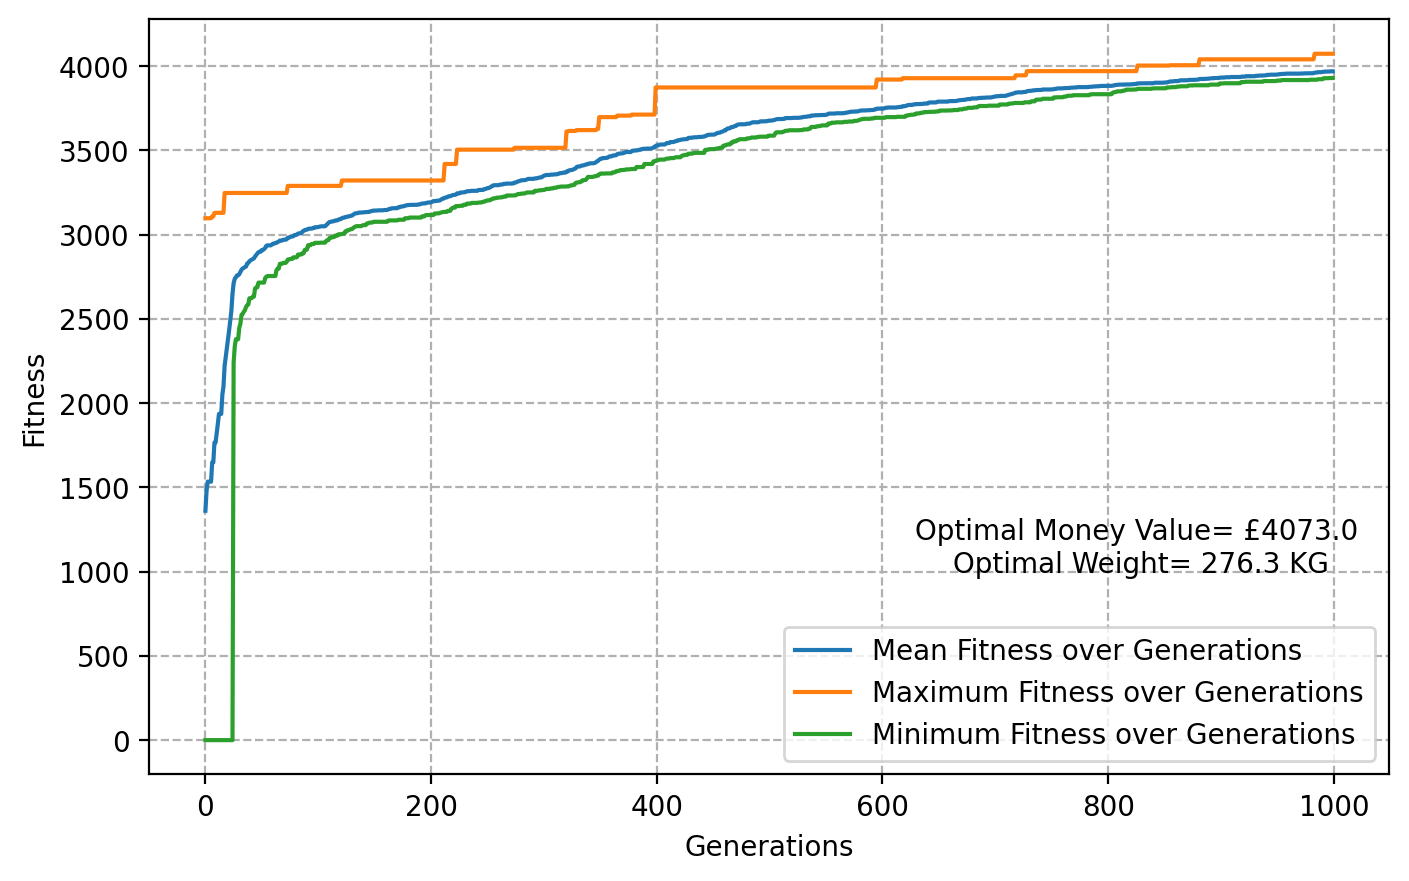

In [33]:
# Plotting the results
fig, ax = plt.subplots(figsize=(8, 5))
fitness_history = beh[4]
plt.plot(list(range(e)),[m.mean() for m in fitness_history], label = "Mean Fitness over Generations")
plt.plot(list(range(e)),[m.max() for m in fitness_history], label = "Maximum Fitness over Generations")
plt.plot(list(range(e)),[m.min() for m in fitness_history], label = "Minimum Fitness over Generations")
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid(linestyle ='--')
ax.text(0.8,0.3,'Optimal Money Value= £{0} \nOptimal Weight= {1} KG'.format(beh[0],round(beh[1],2)),horizontalalignment='center',
         verticalalignment='center',transform=ax.transAxes)
plt.savefig('algo_behav.png')

Above figure shows algorithm behaviour for a random population size (p) =50, tournament size(t) = 2, and mutation rate (M) = 0.01% computed for 1000 fitness evaluations. (Less evaluations used to visualise significant changes in plot)
As the algorithm processes, the individuals with weakest fitness scores are replaced from population by new offspring generated because of crossover and mutation between parents selected using above mentioned criteria. With each generation the mean fitness values of the solutions increases, reaching towards the optimal solution. Minimum value of fitness also grows in same fashion representing increase in maximum fitness. 
Steps in the maximum fitness or the most optimal fitness can be observed which exhibits the property of the EAs where an optimal change is observed slowly in steps. We obtain an optimal solution of £ 3953 weighing 276.3 kg which is less than van capacity limit(277kg) in 1000 generations. A better solution can be obtained for higher number of evaluations/generations.


## Experiment 1 - Running 10 different trials of 10000 fitness evaluations.
#### Note: Each Trial seeded with different Random seed.

In [ ]:
start = timeit.default_timer()

trials = 10
exp1_results = []

for i in range(trials):
    np.random.seed(random.randint(0,1000))  # Seeding trial randomness
    result = main(p=20,chromosome=100,evaluations=10000,t=2,M=1,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit)
    exp1_results.append(result)

fitness_tracker = []
weight_tracker = []
bags_tracker = []

for i in exp1_results:
    fitness_tracker.append(i[0])
    weight_tracker.append(i[1])
    bags_tracker.append(i[3])

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  42.01563237300002


In [ ]:
# Creating DataFrame
trials_df = pd.DataFrame({'Trial Number':range(1,trials+1),'Optimal Value':fitness_tracker,'Optimal Weight':weight_tracker,'Bag Numbers':bags_tracker})
cm = sns.light_palette(color='purple',as_cmap=True)
trials_df.style.background_gradient(cmap = cm)

,Trial Number,Optimal Value,Optimal Weight,Bag Numbers
0,1,4384.000000,276.900000,[ 2 4 5 6 8 9 11 13 15 16 19 20 21 24 25 27 28 31 32 33 34 36 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 72 73 74 76 77 78 80 83 84 87 89 90 91 95 96 99 100]
1,2,4271.000000,276.500000,[ 2 4 5 6 8 9 11 13 15 16 19 20 21 24 25 27 28 31 32 33 34 36 37 38 40 42 43 44 45 46 47 48 50 51 52 53 54 56 57 58 59 60 61 62 63 65 67 69 70 73 74 76 77 78 79 80 83 84 87 89 91 95 96 99 100]
2,3,4379.000000,276.600000,[ 2 4 5 6 8 9 11 15 16 19 20 21 24 25 27 28 31 32 33 34 36 37 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 73 74 76 77 78 80 83 84 86 87 89 90 91 95 96 99 100]
3,4,4383.000000,276.300000,[ 2 4 5 6 8 9 11 13 15 16 19 20 21 24 25 27 28 32 33 34 36 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 72 73 74 76 77 78 80 83 84 87 89 90 91 95 96 98 99 100]
4,5,4387.000000,276.600000,[ 2 3 4 5 6 8 9 11 15 16 19 20 21 24 25 27 28 32 33 34 36 37 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 70 72 73 74 76 77 78 80 83 84 87 89 90 91 95 96 99 100]
5,6,4355.000000,277.000000,[ 2 4 5 6 8 9 11 15 16 20 21 22 24 25 28 29 31 32 33 34 36 37 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 70 71 73 74 76 77 78 80 83 84 87 89 90 91 95 96 99 100]
6,7,4387.000000,276.200000,[ 2 4 5 6 8 9 11 15 16 19 20 21 24 25 27 28 29 31 32 33 34 36 37 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 70 73 74 76 77 78 80 83 84 87 89 90 91 95 96 99 100]
7,8,4364.000000,276.800000,[ 2 4 5 6 9 11 13 15 16 19 20 21 22 24 25 27 28 31 32 33 34 36 37 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 70 72 73 74 76 77 78 80 83 84 87 89 90 91 95 96 98 100]
8,9,4302.000000,276.600000,[ 2 3 5 6 7 8 9 11 13 15 16 19 20 21 24 25 28 29 34 36 37 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 70 73 74 77 78 80 83 84 86 87 89 90 91 95 96 98 99 100]
9,10,4390.000000,276.900000,[ 2 3 4 5 6 8 9 11 15 16 19 20 21 24 25 27 28 31 32 33 34 36 37 38 40 42 44 45 46 47 48 50 51 53 54 56 57 58 59 60 61 62 63 65 66 67 69 70 73 74 76 77 78 80 83 84 87 89 90 91 95 96 99 100]


Above Table shows the results from 10 different trials of the algorithm (all trials seeded with random number seeds), with population size (p) =20, tournament size (t) =2 and mutation rate (M) =0.01%
Multiple trials ensure robust results. As seen in the table, most optimal solution is obtained in trial 10. Summing up the money values from the corresponding bag numbers noted from BankFile.txt gives the same values as the table validating our results, as shown in next 2 cells.

#### Validating Results from Table with data from BankFile.txt

In [ ]:
# Most Optimal Value index from table
opt = trials_df['Optimal Value'].argmax()  

In [ ]:
# Adding the values of sum and weight corresponding to Bag Number with data obtained from BankFile.txt
# This gives the same reuslts as in table and hence we validate our results.

value_sum = 0
weight_sum = 0
for i in exp1_results[opt][3]:
    weight_sum = weight_sum + weight[i-1]
    value_sum = value_sum + value[i-1]

print(value_sum,round(weight_sum,2))

4390.0 276.9


## Experiment 2 - Checking effect of Population Size on overall optimisation performance.

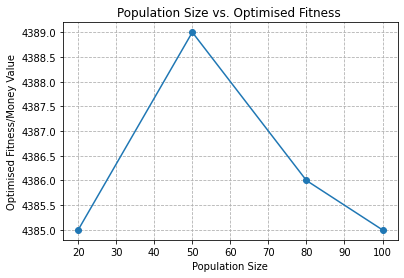

Time: 207.1003675280008 sec


<Figure size 432x288 with 0 Axes>

In [25]:
# Checking effect of population size for varying values of p = 20,50,80,100. Each setting will have 5 trials
start = timeit.default_timer()
p_effect = check_effect(p=[20,50,80,100],c=100,e=10000,t=2,M=1,trials=5,bag_number=bag_number,bag_weights=bag_weights,bag_values=bag_values,cap_limit=cap_limit)
stop = timeit.default_timer()
print('Time: ' +str(stop - start) +' sec')

In [26]:
# Displaying in form of table
out_df= p_effect[1]
out_df

Population Size  ...  Weights
Optimal Fitness Trials                   ...         
4385.0          1                    20  ...    276.5
                2                    20  ...    276.9
                3                    20  ...    276.9
                4                    20  ...    276.9
                5                    20  ...    276.4
4389.0          1                    50  ...    277.0
                2                    50  ...    276.3
                3                    50  ...    276.7
                4                    50  ...    276.6
                5                    50  ...    275.4
4386.0          1                    80  ...    276.8
                2                    80  ...    275.8
                3                    80  ...    276.4
                4                    80  ...    275.6
                5                    80  ...    276.8
4385.0          1                   100  ...    275.4
                2                   100  ...    274.7
                3                   100  ...    276.7
                4                   100  ...    277.0
                5                   100  ...    276.3

[20 rows x 5 columns]

## Experiment 3 - Checking effect of Tournament Size(t) on overall optimisation performance.

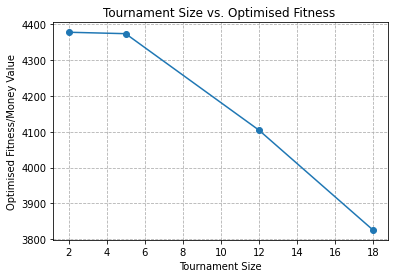

Time: 163.573217634 sec


<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking effect of Tournament size for varying values of t = 2,5,12,18. Each setting will have 5 trials
start = timeit.default_timer()
p=50  # Population Size
c=100
e=10000  # 1000 Evaluations of Fitness Functions 
t=[2,5,12,18]
M=1

t_effect = check_effect(p=p,c=c,e=e,t=t,M=M,trials=5,bag_number=bag_number,bag_weights=bag_weights,bag_values=bag_values,cap_limit=cap_limit)
stop = timeit.default_timer()
print('Time: ' +str(stop - start) +' sec')

In [27]:
# Displaying in form of table
out_df= t_effect[1]
out_df

Population Size  ...  Weights
Optimal Fitness Trials                   ...         
4378.0          1                    50  ...    275.8
                2                    50  ...    276.0
                3                    50  ...    276.8
                4                    50  ...    276.9
                5                    50  ...    276.0
4374.0          1                    50  ...    276.7
                2                    50  ...    275.1
                3                    50  ...    276.5
                4                    50  ...    276.9
                5                    50  ...    276.7
4105.0          1                    50  ...    276.7
                2                    50  ...    276.3
                3                    50  ...    272.2
                4                    50  ...    276.7
                5                    50  ...    275.0
3826.0          1                    50  ...    272.5
                2                    50  ...    276.4
                3                    50  ...    276.4
                4                    50  ...    275.8
                5                    50  ...    270.5

[20 rows x 5 columns]

## Experiment 4 - Checking effect of Mutation(M) on overall optimisation performance.

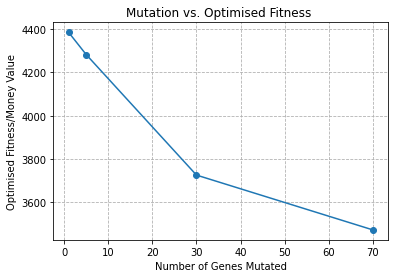

Time: 165.70170790600002 sec


<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking effect of Mutation for varying values of M = 1,5,30,70. Each setting will have 5 trials

start = timeit.default_timer()
p=50  # Population Size
c=100
e=10000  # 1000 Evaluations of Fitness Functions 
t=2
M=[1,5,30,70]
trials = 5

M_effect = check_effect(p=p,c=c,e=e,t=t,M=M,trials=trials,bag_number=bag_number,bag_weights=bag_weights,bag_values=bag_values,cap_limit=cap_limit)

stop = timeit.default_timer()
print('Time: ' +str(stop - start) +' sec')

In [ ]:
# Displaying in form of table
out_df= M_effect[1]
out_df

Population Size  ...  Weights
Optimal Fitness Trials                   ...         
4385.0          1                    50  ...    276.3
                2                    50  ...    277.0
                3                    50  ...    276.8
                4                    50  ...    276.3
                5                    50  ...    276.9
4282.0          1                    50  ...    276.1
                2                    50  ...    276.7
                3                    50  ...    276.6
                4                    50  ...    275.8
                5                    50  ...    276.5
3726.0          1                    50  ...    262.5
                2                    50  ...    276.3
                3                    50  ...    276.4
                4                    50  ...    276.0
                5                    50  ...    273.2
3473.0          1                    50  ...    276.1
                2                    50  ...    274.8
                3                    50  ...    274.8
                4                    50  ...    268.9
                5                    50  ...    274.6

[20 rows x 5 columns]

## Experiment 5  - Comparing combinations of p,t and M.

In [ ]:
# Trying different combinations of p,t,M
start = timeit.default_timer()

p=[20,30,40,50,60,70,80,90,100]  # Population Size
t=[2,4,5,7,9,12,15,18,20] # Tournament Size
M=[1,2,3,4,5,10,20,40,60] # Mutation
c=100
e=10000  # 1000 Evaluations of Fitness Functions 

exp4_results = []
plist = []
tlist = []
Mlist = []
fitness_list = []
weight_list = []

for i in p:
    for j in t:
        for k in M:
            plist.append(i)
            tlist.append(j)
            Mlist.append(k)
            result = main(p=i,chromosome=c,evaluations=e,t=j,M=k,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit)[0:2]
            fitness_list.append(result[0])
            weight_list.append(result[1])

stop = timeit.default_timer()           
print('Time: ' +str(stop - start) +' sec')

Time: 7050.586510491 sec


In [ ]:
# Displaying in form of table
comp_df = pd.DataFrame({'Population Size':plist,'Tournament Size':tlist,'Mutation(Number of Genes Mutated)':Mlist, 'Optimal Value':fitness_list, 'Optimal Weight':weight_list})
comp_df= comp_df.sort_values(by = 'Optimal Value',ascending=False)

In [ ]:
cm = sns.light_palette(color='purple',as_cmap=True)
comp_df.style.background_gradient(cmap = cm)

## Experiment 6 - EA Without Crossover.

#### Running 5 trials of EA without crossover

In [16]:
start = timeit.default_timer()

trials = 5
skip = 'crossover'
e = 10000
exp5_results = []

for i in range(trials):
    np.random.seed(random.randint(0,1000))
    result = skip_main(p=30,chromosome=100,evaluations=e,t=2,M=1,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit,skip=skip)
    exp5_results.append(result)

fitness_tracker = []
weight_tracker = []
bags_tracker = []
fitness_history_tracker = []

for i in exp5_results:
    fitness_tracker.append(i[0])
    weight_tracker.append(i[1])
    bags_tracker.append(i[3])
    fitness_history_tracker.append(i[4])

fitness_history_tracker = np.array(fitness_history_tracker)

maxes_noco = []
for i in fitness_history_tracker:
  maxes_noco.append(i.max())

maxes_noco = np.array(maxes_noco)

fitness_history_nocrossover = fitness_history_tracker[maxes_noco.argmax()]  # Extracting fitness history of generations from best trial for plotting
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  26.919865294000033


In [17]:
# Displaying results in table
skip_cross_df = pd.DataFrame({'Trial Number':range(1,trials+1),'Optimal Value':fitness_tracker,'Optimal Weight':weight_tracker})#,'Bag Numbers':bags_tracker})
cm = sns.light_palette(color='purple',as_cmap=True)
skip_cross_df.style.background_gradient(cmap = cm)

,Trial Number,Optimal Value,Optimal Weight
0,1,3923.000000,276.500000
1,2,3995.000000,276.900000
2,3,4124.000000,276.700000
3,4,4130.000000,277.000000
4,5,4015.000000,276.800000


## Experiment 7 - EA Without Mutation.

#### Running 5 trials of EA without Mutation

In [19]:
start = timeit.default_timer()

trials = 5
skip = 'mutation'
e = 10000
exp6_results = []

for i in range(trials):
    np.random.seed(random.randint(0,1000))
    result_mut = skip_main(p=30,chromosome=100,evaluations=e,t=2,M=1,item_number=bag_number,weight=bag_weights,value=bag_values,cap_limit=cap_limit,skip=skip)
    exp6_results.append(result_mut)

fitness_tracker = []
weight_tracker = []
bags_tracker = []
fitness_history_tracker = []

for i in exp6_results:
    fitness_tracker.append(i[0])
    weight_tracker.append(i[1])
    bags_tracker.append(i[3])
    fitness_history_tracker.append(i[4])

fitness_history_tracker = np.array(fitness_history_tracker)

maxes_nomo = []
for i in fitness_history_tracker:
  maxes_nomo.append(i.max())

maxes_nomo = np.array(maxes_nomo)


fitness_history_nomutation = fitness_history_tracker[maxes_nomo.argmax()]  # Extracting fitness history of generations from last trial for plotting
stop = timeit.default_timer()
print('Time(sec): ', stop - start)

Time(sec):  25.22750419299996


In [20]:
# Displaying results in table
skip_mut_df = pd.DataFrame({'Trial Number':range(1,trials+1),'Optimal Value':fitness_tracker,'Optimal Weight':weight_tracker})#,'Bag Numbers':bags_tracker})
cm = sns.light_palette(color='purple',as_cmap=True)
skip_mut_df.style.background_gradient(cmap = cm)

,Trial Number,Optimal Value,Optimal Weight
0,1,3195.000000,274.700000
1,2,3082.000000,277.000000
2,3,3096.000000,276.000000
3,4,3142.000000,276.800000
4,5,3248.000000,276.400000


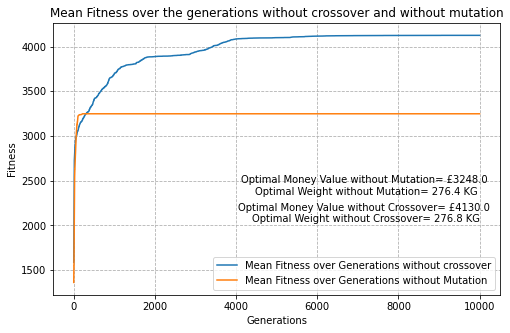

In [21]:
# Plotting comaprison chart of mean fitness without crossover and without mutation
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(list(range(e)),[m.mean() for m in fitness_history_nocrossover], label = "Mean Fitness over Generations without crossover")
plt.plot(list(range(e)),[m.mean() for m in fitness_history_nomutation], label = "Mean Fitness over Generations without Mutation")
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid(linestyle ='--')
plt.title("Mean Fitness over the generations without crossover and without mutation")
ax.text(0.7,0.4,'Optimal Money Value without Mutation= £{0} \nOptimal Weight without Mutation= {1} KG'.format(exp6_results[maxes_nomo.argmax()][0],round(exp6_results[maxes_nomo.argmax()][1],2)),horizontalalignment='center',
         verticalalignment='center',transform=ax.transAxes)
ax.text(0.7,0.3,'Optimal Money Value without Crossover= £{0} \nOptimal Weight without Crossover= {1} KG'.format(exp5_results[maxes_noco.argmax()][0],round(result[1],2)),horizontalalignment='center',
         verticalalignment='center',transform=ax.transAxes)

plt.savefig('no_mutation_no_crossover.png')

# Conclusion

From observations in Expermient 5. A population size (p) = 30, Tournament Size (t) = 2, 
Mutation (M) = 1 or 0.01% produces the best fitness value of £4390 and optimal weight of 
276.3 Kg. This combination of p,t,m produced the best results.

These parameters typically interact with each other nonlinearly, so they can not be 
optimized once at a time. Therefore, the best values are obtained empirically. 
From Experiment 2, where observations are made by varying population size, it can 
be observed that a small population size of 50% seems to provide better fitness values. 
Choosing the minimum population size and maximum population size shows approximately 
same fitness. However, large population size makes the computation costly than small size. 
Considering, population size(p) close to 30%-50% proved to give better results in terms of 
both fitness and computational efficiency.

Tournament Size (t) plays an important role in Selection Pressure. They are directly 
proportional to each other. We need to have a moderate amount of selection pressure 
according to the population size. A small selection pressure can cause no evolutionary 
progress at all, whereas high selection pressure can cause EA to land in local optima. A 
moderate selection pressure can help to achieve global optimum. A tournament size of t=2 
for a population size of 30 seems to be a moderate selection pressure. It is clearer Experiment 3, 
where observations are made using varying values of t for a population size of
50. Increasing selection pressure more than a moderate value causes decline in optimal 
fitness as getting stuck in local optima.

Mutation (M) helps to find the local neighbours. A small change in the solution leads to big 
changes in fitness value. Most of the good results in Experiment 5 are obtained for low values of 
gene mutation (M=1,2). The smaller values help in exploring the global space, increasing the 
chances of finding better solution. Moreover, a larger value of mutation can cause skipping 
optimum values in rough landscape of realistic problems. Experiment 4 helps to study 
the effect of increasing mutation rate on fitness value for a fixed population size and 
tournament size. Fitness declines evidently with increasing mutation rate. Therefore, lower
the mutation is better.

<b>Effect of Removing Mutation and Crossover</b> <br> </br>
The performance of optimal fitness fell significantly on removal of mutation as compared 
to removal of crossover. Optimal Fitness without crossover and mutation for different trials 
can be seen in Experiments 6 and 7, which is 4130 and 3248, respectively. But none of the 
approaches reaches much closer to the optimal solution which is around 4390 from 
experiment 1. 
Spears (1993) [1] verified the idea that, Mutation and crossover have the same ability for 
disruption of existing schema, crossover is more robust constructor of new schemas. 
Mühlenbein (1992, p. 15) [2] suggested hill−climbing strategy will work better than a GA with crossover and that "the power of mutation has been underestimated in traditional genetic 
algorithms."
A single choice between crossover or mutation cannot produce the best result. But a balance 
between crossover, mutation and other parameters like selection can produce best results.
As it provides a mix of exploitative and exploratory behaviour of these operators.
Also, the comparison chart in Experiment 7 shows that mutation is more effective in exploring 
new solutions. On the other hand, when using only crossover, the algorithm converges at early stage.

<b>References:</b> <br> </br>
1.) Spears (1993) An Overview of Evolutionary Computation. <br> </br>
2.) Mühlenbein, H. (1992). How genetic algorithms really work. I. Mutation and hillclimbing. Proc.of PPSN II (Parallel Problem Solving from Nature), 15–25